# Parallel Coordinate Plot: Real Case Example -- Mean Climate

## 1. Read data from JSON files

In [1]:
import numpy as np
import glob
import json
import pandas as pd


def get_units(var, results_dict_var):
    model_list = sorted(list(results_dict_var['RESULTS'].keys()))
    units = results_dict_var['RESULTS'][model_list[0]]["units"]
    return units


def get_data(results_dict, var_list, region, stat, season, mip):
    try:
        model_list = sorted(list(results_dict['rlut']['RESULTS'].keys()))
    except:
        model_list = sorted(list(results_dict[var_list[0]]['RESULTS'].keys()))
    
    data_list = []
    index = 1
    for model in model_list:
        try:
            run_list = list(results_dict['rlut']['RESULTS'][model]['default'].keys())
        except:
            run_list = list(results_dict[var_list[0]]['RESULTS'][model]['default'].keys())
            
        run_list.remove('source')
        for run in run_list:
            tmp_list = []
            for var in var_list:
                try:
                    tmp = float(results_dict[var]['RESULTS'][model]['default'][run][region][stat][season])
                except:
                    tmp = None
                tmp_list.append(tmp)
            data_list.append([index, mip, model, run, model+'_'+run] + tmp_list)
            index += 1

    data_list_column_names = ['index', 'mip', 'model', 'run', 'model_run'] + var_list

    # Convert data in pythin dict to pandas dataframe format
    df = pd.DataFrame(columns=data_list_column_names, data=data_list)
    return df

In [2]:
mip = 'cmip6'
data_version = "v20201008"

json_list = glob.glob('../json_files/*'+mip+'*'+data_version+'.json')
var_list = sorted([p.split('/')[-1].split('.')[0] for p in json_list])

print('json_list:', json_list)

# Simple re-order variables
try:
    var_list.remove('zg-500')
    idx_sfcWind = var_list.index('sfcWind')
    var_list.insert(idx_sfcWind+1, 'zg-500')
    print('var_list: ', var_list)
except:
    pass

results_dict = {}  # merged dict by reading all JSON files
units_list = []

for var in var_list:
    json_file = '../json_files/' + var + '.' + mip + '.historical.regrid2.2p5x2p5.' + data_version + '.json'
    #print(var, json_file)
    with open(json_file) as fj:
        results_dict[var] = json.load(fj)
    units_list.append(get_units(var, results_dict[var]))

units_description_list = []
for var, units in zip(var_list, units_list):
    #print(var, "["+units+"]")
    if var == "pr":
        units_description_list.append(var + "\n[mm d-1]")
    else:
        units_description_list.append(var + "\n["+units+"]")

units_description_string = "Units: " + ", ".join(units_description_list)
print("Units:", units_description_list)

json_list: ['../json_files/rsdt.cmip6.historical.regrid2.2p5x2p5.v20201008.json', '../json_files/rltcre.cmip6.historical.regrid2.2p5x2p5.v20201008.json', '../json_files/tas.cmip6.historical.regrid2.2p5x2p5.v20201008.json', '../json_files/uas.cmip6.historical.regrid2.2p5x2p5.v20201008.json', '../json_files/sfcWind.cmip6.historical.regrid2.2p5x2p5.v20201008.json', '../json_files/rsus.cmip6.historical.regrid2.2p5x2p5.v20201008.json', '../json_files/vas.cmip6.historical.regrid2.2p5x2p5.v20201008.json', '../json_files/psl.cmip6.historical.regrid2.2p5x2p5.v20201008.json', '../json_files/ta-850.cmip6.historical.regrid2.2p5x2p5.v20201008.json', '../json_files/rsut.cmip6.historical.regrid2.2p5x2p5.v20201008.json', '../json_files/va-850.cmip6.historical.regrid2.2p5x2p5.v20201008.json', '../json_files/va-200.cmip6.historical.regrid2.2p5x2p5.v20201008.json', '../json_files/rlutcs.cmip6.historical.regrid2.2p5x2p5.v20201008.json', '../json_files/rsds.cmip6.historical.regrid2.2p5x2p5.v20201008.json',

In [3]:
#stats = ['rms_xyt', 'rms_xy', 'rmsc_xy', 'cor_xy', 'bias_xy']  # problem with cor_xy
stats = ['rms_xyt', 'rms_xy', 'rmsc_xy', 'bias_xy']
regions = ['global', 'TROPICS', 'NHEX', 'SHEX']

df_dict = {}
grid_dict = {}
seasons = {}

for stat in stats:
    df_dict[stat] = {}
    grid_dict[stat] = {}

    if stat in ['rms_devzm', 'rms_xyt', 'rms_y', 'std-obs_xy_devzm', 'std-obs_xyt', 'std_xy_devzm', 'std_xyt']:
        seasons[stat] = ['ann']
    else:
        seasons[stat] = ['djf', 'mam', 'jja', 'son']
        
    for season in seasons[stat]:
        df_dict[stat][season] = {}
        grid_dict[stat][season] = {}
        for region in regions:
            #print(stat, season, region)
            df_dict[stat][season][region] = get_data(results_dict, var_list, region, stat, season, mip) 

In [4]:
df_dict['rms_xyt']['ann']['global']

,index,mip,model,run,model_run,pr,psl,rlds,rltcre,rlus,...,ta-200,ta-850,tas,ts,ua-200,ua-850,uas,va-200,va-850,vas
0,1,cmip6,ACCESS-CM2,r1i1p1,ACCESS-CM2_r1i1p1,1.903,260.772,13.512,9.543,10.851,...,2.746,1.499,2.062,2.243,4.714,1.469,1.136,1.915,0.911,0.957
1,2,cmip6,ACCESS-ESM1-5,r1i1p1,ACCESS-ESM1-5_r1i1p1,1.892,258.906,10.951,8.180,10.440,...,2.407,1.360,1.904,2.051,4.254,1.577,1.146,1.986,0.946,0.943
2,3,cmip6,AWI-ESM-1-1-LR,r1i1p1,AWI-ESM-1-1-LR_r1i1p1,1.986,248.260,14.487,9.695,12.196,...,NaN,NaN,1.799,2.133,4.497,1.819,1.434,2.236,1.032,1.103
3,4,cmip6,BCC-CSM2-MR,r1i1p1,BCC-CSM2-MR_r1i1p1,1.828,313.653,13.632,8.171,11.375,...,NaN,NaN,2.449,2.208,NaN,NaN,1.332,NaN,NaN,1.077
4,5,cmip6,BCC-ESM1,r1i1p1,BCC-ESM1_r1i1p1,1.734,260.186,14.091,9.051,12.369,...,4.013,1.885,2.795,2.626,4.391,1.985,1.394,1.978,1.152,1.149
5,6,cmip6,CAMS-CSM1-0,r1i1p1,CAMS-CSM1-0_r1i1p1,1.834,211.601,17.980,8.328,13.180,...,NaN,NaN,2.508,2.804,NaN,NaN,1.965,NaN,NaN,1.497
6,7,cmip6,CESM2,r1i1p1,CESM2_r1i1p1,1.405,259.436,10.961,7.378,10.009,...,1.984,1.339,1.515,1.850,3.849,1.644,NaN,1.893,0.915,NaN
7,8,cmip6,CESM2-FV2,r1i1p1,CESM2-FV2_r1i1p1,1.549,264.917,12.592,8.409,10.703,...,2.718,1.888,1.823,2.100,4.036,2.135,NaN,2.063,1.025,NaN
8,9,cmip6,CESM2-WACCM,r1i1p1,CESM2-WACCM_r1i1p1,1.357,251.407,10.753,7.227,9.766,...,NaN,NaN,1.512,1.808,3.719,1.647,NaN,1.829,0.891,NaN
9,10,cmip6,CESM2-WACCM-FV2,r1i1p1,CESM2-WACCM-FV2_r1i1p1,1.688,248.929,12.136,8.664,10.744,...,2.720,1.805,1.775,2.100,3.994,2.099,NaN,2.067,1.039,NaN


In [5]:
data = df_dict['rms_xyt']['ann']['global'][var_list].to_numpy()
model_names = df_dict['rms_xyt']['ann']['global']['model'].tolist()
metric_names = var_list
model_highlights = ['E3SM-1-0', 'E3SM-1-1', 'E3SM-1-1-ECA']
print('data.shape:', data.shape)
print('len(metric_names): ', len(metric_names))
print('len(model_names): ', len(model_names))

data.shape: (40, 25)
len(metric_names):  25
len(model_names):  40


## 2. Plot

In [6]:
from parallel_coordinate_plot_lib import parallel_plot

parallel_plot

Input parameters:
- data: 2-d numpy array for metrics
- metric_names: list, names of metrics for individual vertical axes (axis=1)
- model_names: list, name of models for markers/lines (axis=0)
- model_highlights: list, default=None, List of models to highlight as lines
- show_boxplot: bool, default=True, show box and wiskers plot
- show_violin: bool, default=True, show violin plot
- title: string, default=None, plot title
- identify_all_models: bool, default=True. Show and identify all models using markers
- filename: string, default='test', file name for saving the plot
- figsize: tuple (two numbers), default=(15,5), image size
- xtick_labels: list, default=None, list of strings that to use as metric names (optional)
- colormap: string, default='viridis', matplotlib colormap

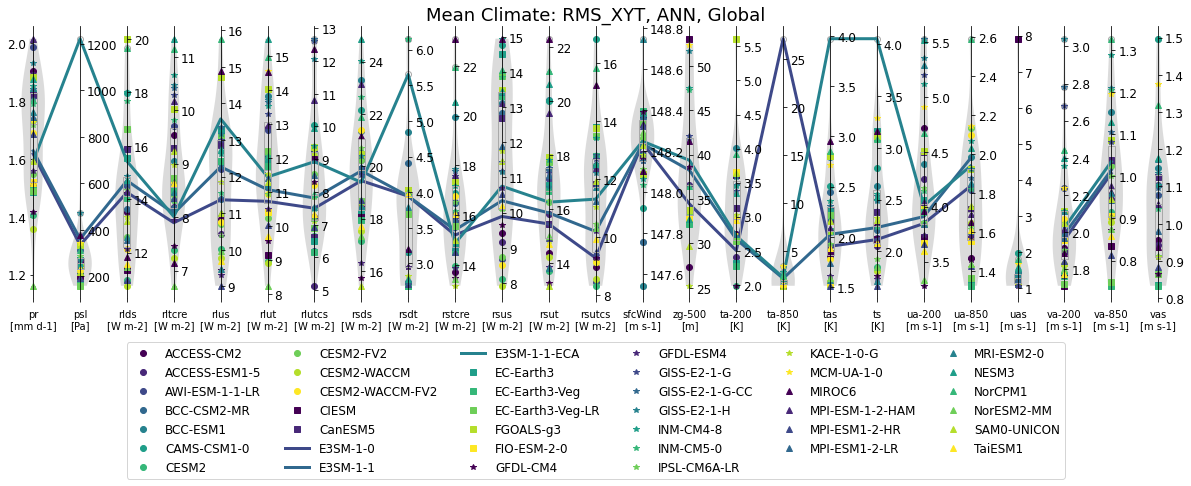

In [7]:
parallel_plot(data, metric_names, model_names, model_highlights, title='Mean Climate: RMS_XYT, ANN, Global', 
              filename='mean_clim_rms_xyt_ann_global', figsize=(21, 5), 
              xtick_labels=units_description_list)

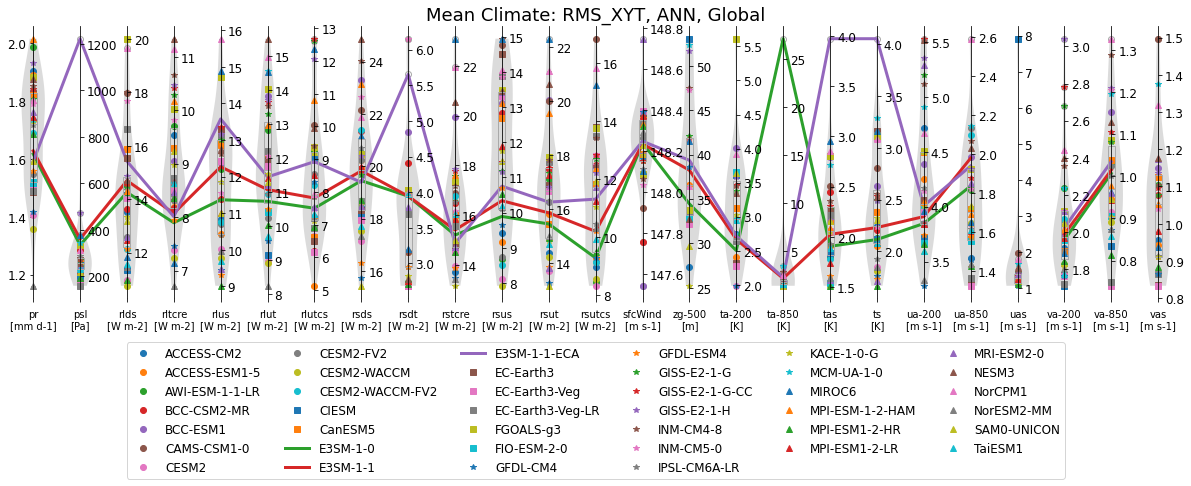

In [8]:
parallel_plot(data, metric_names, model_names, model_highlights, title='Mean Climate: RMS_XYT, ANN, Global', 
              filename='mean_clim_rms_xyt_ann_global', figsize=(21, 5), colormap='tab10',
              xtick_labels=units_description_list)

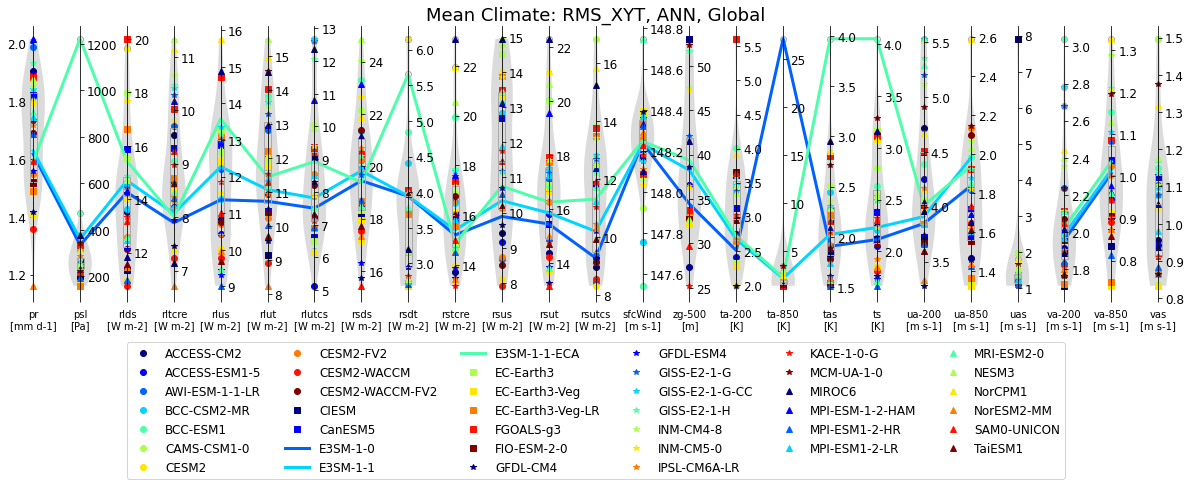

In [9]:
parallel_plot(data, metric_names, model_names, model_highlights, title='Mean Climate: RMS_XYT, ANN, Global', 
              filename='mean_clim_rms_xyt_ann_global', figsize=(21, 5), colormap='jet',
              xtick_labels=units_description_list)